Best Fit Curve: y=
            3             2
-9.869e-07 x + 9.806e-05 x - 0.00405 x + 0.1155


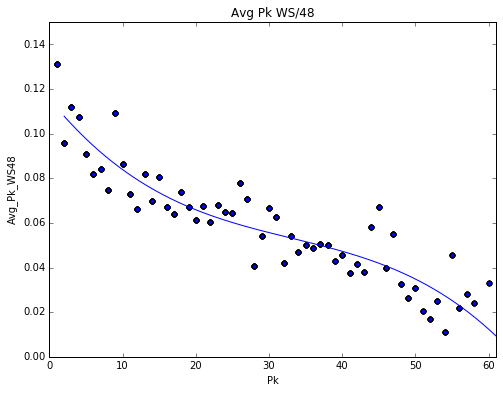

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from scipy.optimize import curve_fit
%matplotlib inline

# Read data and limit to 2015 or earlier
df = pd.DataFrame.from_csv('data.csv')
df = df.loc[df['Year'] <= 2015]

# Take average pick value
df['Avg_Pk_WS48'] = df.groupby('Pk')['WS/48'].transform(lambda x: x.mean())

# Curve fitting seems to do the trick, although I'd like to keep pick #1 without the curve fit
X = df['Pk']
Y = df['Avg_Pk_WS48']
z = np.polyfit(X, Y, 3)   
f = np.poly1d(z)
x_new = np.linspace(2, 61, 500)
y_new = f(x_new)
print "Best Fit Curve: y="
print f
df.plot(y='Avg_Pk_WS48', x='Pk', kind='scatter', \
          title='Avg Pk WS/48', xlim=(0, 61), ylim=(0, 0.15), figsize=(8, 6))
plt.plot(x_new, y_new)

In [2]:
df = df.sort_values('Pk')
x = df['Pk']

# Apply curve fit
df['Curve_Fit_Pk_WS48'] = f[3]*(x**3) + f[2]*(x**2) + f[1]*x + f[0]
# Replace #1 suggested by curve fir with simple average #1 pick
df.loc[df.Pk == 1, ['Curve_Fit_Pk_WS48']] = df['Avg_Pk_WS48']

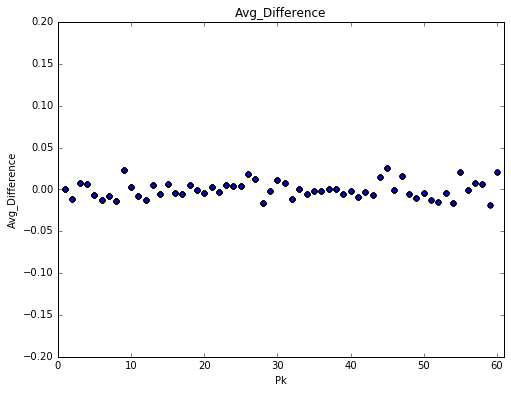

In [23]:
df['Difference'] = df['WS/48'] - df['Curve_Fit_Pk_WS48']
df['Avg_Difference'] = df.groupby('Pk')['Difference'].transform(lambda x: x.mean())

# Looks uniform
df.plot(y='Avg_Difference', x='Pk', kind='scatter', \
          title='Avg_Difference', xlim=(0, 61), ylim=(-0.2, 0.2), figsize=(8, 6))

In [24]:
df_TM = df.groupby('Tm').mean()
df_TM = df_TM.sort('Difference', ascending=False)[['Adj_Difference']]
df_TM

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Adj_Difference
Tm,
SAS,-0.021419
IND,-0.046587
NOP,-0.048401
HOU,-0.047514
OKC,-0.052213
UTA,-0.051672
BOS,-0.051897
GSW,-0.058142
TOR,-0.056753
